List of found data: 

01-22-2020.csv
01-23-2020.csv
01-24-2020.csv
01-25-2020.csv
01-26-2020.csv
01-27-2020.csv
01-28-2020.csv
01-29-2020.csv
01-30-2020.csv
01-31-2020.csv
02-01-2020.csv
02-02-2020.csv
02-03-2020.csv
02-04-2020.csv
02-05-2020.csv
02-06-2020.csv
02-07-2020.csv
02-08-2020.csv
02-09-2020.csv
02-10-2020.csv
02-11-2020.csv
02-12-2020.csv
02-13-2020.csv
02-14-2020.csv
02-15-2020.csv
02-16-2020.csv
02-17-2020.csv
02-18-2020.csv
02-19-2020.csv
02-20-2020.csv
02-21-2020.csv
02-22-2020.csv
02-23-2020.csv
02-24-2020.csv
02-25-2020.csv
02-26-2020.csv
02-27-2020.csv
02-28-2020.csv
02-29-2020.csv
03-01-2020.csv
03-02-2020.csv
03-03-2020.csv
03-04-2020.csv
03-05-2020.csv
03-06-2020.csv
03-07-2020.csv
03-08-2020.csv
03-09-2020.csv
03-10-2020.csv
03-11-2020.csv
03-12-2020.csv
03-13-2020.csv
03-14-2020.csv


C:\Users\Mueller\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




 Previe of dataset.............................................................

   Confirmed         country  Deaths      Last Update  Latitude  Longitude  \
0        1.0  Mainland China     NaN  1/22/2020 17:00       NaN        NaN   
1       14.0  Mainland China     NaN  1/22/2020 17:00       NaN        NaN   
2        6.0  Mainland China     NaN  1/22/2020 17:00       NaN        NaN   
3        1.0  Mainland China     NaN  1/22/2020 17:00       NaN        NaN   
4        NaN  Mainland China     NaN  1/22/2020 17:00       NaN        NaN   

    province  Recovered        date  
0      Anhui        NaN  2020-01-22  
1    Beijing        NaN  2020-01-22  
2  Chongqing        NaN  2020-01-22  
3     Fujian        NaN  2020-01-22  
4      Gansu        NaN  2020-01-22  

 Saving to CSV.............................................................

AxesSubplot(0.125,0.125;0.775x0.755)
            Confirmed  Deaths  Recovered
date                                    
2020-01-22      555.0   

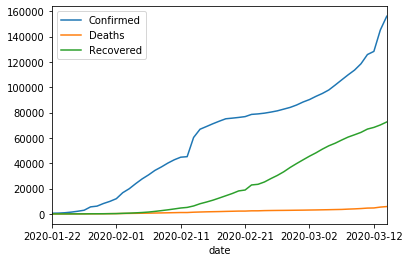

In [10]:
import pandas as pd
import glob
import datetime
import os
import sqlite3

#Define path, where I cloned the csv files from Johns Hopkins Github Repository
path = '..\Clone-Data-COVID-19\csse_covid_19_data\csse_covid_19_daily_reports' # use your path
all_files = glob.glob(path + "/*.csv")

#Creating empty list
li = []

#print(all_files)
print("List of found data: \n")
for filename in all_files:
    datas= filename.lstrip(path)
    print(datas)

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    #get date out of filename
    date = filename.rstrip('.csv').lstrip(path)
    #Convert date format
    date2=datetime.datetime.strptime(date, '%m-%d-%Y').strftime('%Y-%m-%d')
    #print(date2)
    #write date to Dataframe
    df['date']=date2
    li.append(df)


#Write list do dataframe
frame = pd.concat(li, axis=0, ignore_index=True)

#Rename Columns
frame=frame.rename(columns={'Country/Region':'country','Province/State':'province'})

print("\n Previe of dataset.............................................................\n")
print(frame.head())

#Save to csv-file
print("\n Saving to CSV.............................................................\n")
frame.to_csv('python-complete-data.csv')

#The same as plot
print(frame.groupby(['date'])["Confirmed",'Deaths','Recovered'].sum().plot())

#Lets look at the sum of Confirmed, Deaths and Recovered per date
print(frame.groupby(['date'])["Confirmed",'Deaths','Recovered'].sum())

In [12]:
#Lets look at the sum of Confirmed, Deaths and Recovered per date
frame_grouped = frame.groupby(['date','country'])["Confirmed",'Deaths','Recovered'].sum()
print(frame_grouped)
frame_grouped.to_csv('python-complete-data-grouped.csv')

                                             Confirmed  Deaths  Recovered
date       country                                                       
2020-01-22 Hong Kong                               0.0     0.0        0.0
           Japan                                   2.0     0.0        0.0
           Macau                                   1.0     0.0        0.0
           Mainland China                        547.0    17.0       28.0
           South Korea                             1.0     0.0        0.0
           Taiwan                                  1.0     0.0        0.0
           Thailand                                2.0     0.0        0.0
           US                                      1.0     0.0        0.0
2020-01-23 Australia                               0.0     0.0        0.0
           Brazil                                  0.0     0.0        0.0
           Colombia                                0.0     0.0        0.0
           Hong Kong                  